# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# Load the dataset
df = pd.read_csv(r'/kaggle/input/telecom-churn/telecom_churn.csv')

In [3]:
# read the first 5 rows of the dataset
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
# read the end 5 rows of the dataset
df.tail()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [5]:
# read the shape of the dataset
df.shape

(3333, 11)

In [6]:
# show information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [7]:
# show statistics of the dataset
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [8]:
# check for missing values
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [9]:
# check duplicates
df.duplicated().sum()

0

In [10]:
# count the number of unique values in each column
df.nunique()

Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

In [11]:
# show count of each unique value in the 'Churn' column
df.Churn.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [12]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    2850
1    2850
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size = .25 , random_state = 42)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
    

In [16]:

LRM = LogisticRegression(max_iter=1000)
RFM = RandomForestClassifier()
DTM = DecisionTreeClassifier()
SVCM = SVC()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()

models = [LRM , RFM , DTM , SVCM , GBC , ABC]
results = {}
for model in models:
    print(f'The Model is {model}')
    k_folds = KFold(n_splits=5, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, X_train , y_train, cv=k_folds)
    
    print("K-Fold Cross-Validation Scores:", scores)
    
    mean_accuracy = np.mean(scores)
    results[model] = mean_accuracy
    print("Mean Accuracy:", mean_accuracy)
    print('-------------------------')

The Model is LogisticRegression(max_iter=1000)
K-Fold Cross-Validation Scores: [0.79298246 0.79649123 0.79415205 0.76608187 0.81988304]
Mean Accuracy: 0.7939181286549708
-------------------------
The Model is RandomForestClassifier()
K-Fold Cross-Validation Scores: [0.91812865 0.90877193 0.94035088 0.91461988 0.92865497]
Mean Accuracy: 0.9221052631578948
-------------------------
The Model is DecisionTreeClassifier()
K-Fold Cross-Validation Scores: [0.87368421 0.86315789 0.89356725 0.86666667 0.86315789]
Mean Accuracy: 0.872046783625731
-------------------------
The Model is SVC()
K-Fold Cross-Validation Scores: [0.6619883  0.67368421 0.64561404 0.6502924  0.66432749]
Mean Accuracy: 0.6591812865497075
-------------------------
The Model is GradientBoostingClassifier()
K-Fold Cross-Validation Scores: [0.88421053 0.88888889 0.89005848 0.87836257 0.8994152 ]
Mean Accuracy: 0.888187134502924
-------------------------
The Model is AdaBoostClassifier()
K-Fold Cross-Validation Scores: [0.8643

In [17]:
best_model = max(results, key=results.get)
print(f'The best model is {best_model} with a mean accuracy of {results[best_model]}')

best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

The best model is RandomForestClassifier() with a mean accuracy of 0.9221052631578948


In [18]:
best_model.score(X_train, y_train)

1.0

In [19]:
best_model.score(X_test, y_test)

0.9214035087719298

In [20]:
accuracy_score(y_test, y_pred_best)

0.9214035087719298

<Axes: >

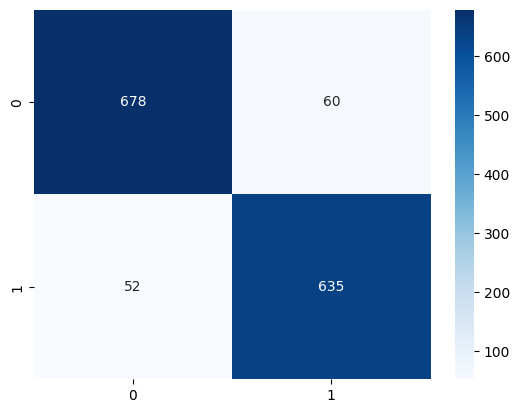

In [21]:
confusion_matrix(y_test, y_pred_best)
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')

In [22]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       738
           1       0.91      0.92      0.92       687

    accuracy                           0.92      1425
   macro avg       0.92      0.92      0.92      1425
weighted avg       0.92      0.92      0.92      1425



In [23]:
y_pred_best[:10]


array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [24]:
y_test[:10]

1436    0
748     0
4596    1
1448    0
2543    0
944     1
1595    0
1666    0
2623    0
4805    1
Name: Churn, dtype: int64

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [26]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [27]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [28]:
best_rf.score(X_train, y_train)

1.0

In [29]:
best_rf.score(X_test, y_test)

0.92

In [30]:
y_pred[:10]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [31]:
y_test[:10]

1436    0
748     0
4596    1
1448    0
2543    0
944     1
1595    0
1666    0
2623    0
4805    1
Name: Churn, dtype: int64

<Axes: >

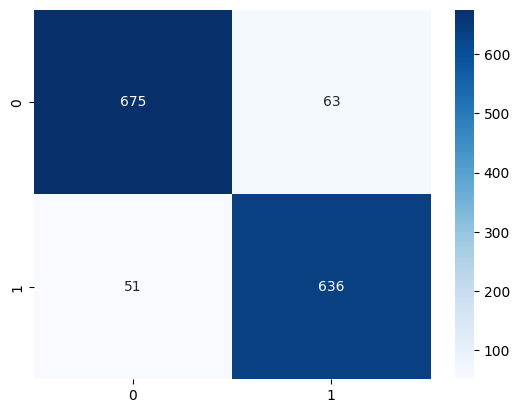

In [32]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       738
           1       0.91      0.93      0.92       687

    accuracy                           0.92      1425
   macro avg       0.92      0.92      0.92      1425
weighted avg       0.92      0.92      0.92      1425

